In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
! pip3 install -r /content/gdrive/MyDrive/cdt-gnn-returns/asos-gnn-returns-requirements-colab.txt

path = '/content/gdrive/MyDrive/cdt-gnn-returns/src'
os.chdir(path)
print(os.getcwd())
from io import RawIOBase
from typing import Callable, List, Optional
import os.path as osp
import torch
from torch_geometric.data import (HeteroData, InMemoryDataset, download_url,extract_zip)

import pandas as pd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
tcmalloc: large alloc 1636958208 bytes == 0x351c000 @  0x7f9ffde821e7 0x4a3940 0x5b438c 0x5ea94f 0x5939cb 0x594cd3 0x5d0ecb 0x59aeca 0x515655 0x593dd7 0x511e2c 0x593dd7 0x511e2c 0x549e0e 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549e0e 0x4bca8a 0x59c019
tcmalloc: large alloc 1636958208 bytes == 0x64e3c000 @  0x7f9ffde821e7 0x4a3940 0x5b438c 0x64cfe7 0x59b076 0x515655 0x593dd7 0x511e2c 0x593dd7 0x511e2c 0x549e0e 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549e0e 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576
tcmalloc: large alloc 1636958208 bytes == 0xc675c000 @  0x7f9ffde821e7 0x4a3940 0x59b5e2 

In [ ]:

device = 'cuda' if torch.cuda.is_available() else 'cpu'
class ASOSGnnDataNode2Vec(InMemoryDataset):
    r"""A heterogeneous rating dataset, assembled by GroupLens Research from
    the `MovieLens web site <https://movielens.org>`_, consisting of nodes of
    type :obj:`"movie"` and :obj:`"user"`.
    User ratings for movies are available as ground truth labels for the edges
    between the users and the movies :obj:`("user", "rates", "movie")`.

    Args:
        root (string): Root directory where the dataset should be saved.
        transform (callable, optional): A function/transform that takes in an
            :obj:`torch_geometric.data.HeteroData` object and returns a
            transformed version. The data object will be transformed before
            every access. (default: :obj:`None`)
        pre_transform (callable, optional): A function/transform that takes in
            an :obj:`torch_geometric.data.HeteroData` object and returns a
            transformed version. The data object will be transformed before
            being saved to disk. (default: :obj:`None`)
        model_name (str): Name of model used to transform movie titles to node
            features. The model comes from the`Huggingface SentenceTransformer
            <https://huggingface.co/sentence-transformers>`_.
    """

    def __init__(self, root, transform: Optional[Callable] = None,
                 pre_transform: Optional[Callable] = None,
                 model_name: Optional[str] = "asos-gnn-model"):
        self.model_name = model_name
        super().__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

    reduced = 1
    
    if reduced ==1:
        # reduced data
        @property
        def raw_file_names(self) -> List[str]:
          # FULL DATASET (training)
            # return [
            #     osp.join('gnn_reduced_data', 'customer_nodes_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'product_nodes_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'event_table_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'event_table_testing_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'customer_nodes_testing_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'product_nodes_testing_FULL.csv'),
            # ] 
            # to get TESTDATASET, run this:
            # return [
            #     osp.join('gnn_reduced_data', 'customer_nodes_testing_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'product_nodes_testing_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'event_table_testing_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'event_table_testing_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'customer_nodes_testing_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'product_nodes_testing_FULL.csv'),
            # ] 
            # TOY DATASET (ABOUT 1000 EXAMPLES)
            # return [
            #     osp.join('gnn_reduced_data', 'customers_training_sample.csv'),
            #     osp.join('gnn_reduced_data', 'products_training_sample.csv'),
            #     osp.join('gnn_reduced_data', 'events_training_sample.csv'),
            #     osp.join('gnn_reduced_data', 'events_testing_sample.csv'),
            #     osp.join('gnn_reduced_data', 'customers_testing_sample.csv'),
            #     osp.join('gnn_reduced_data', 'products_testing_sample.csv'),
            # ] 
           # SAMPLE DATASET (60,000 EXAMPLES)
            return [
                osp.join('gnn_reduced_data', 'customers_training_sample_v2.csv'),
                osp.join('gnn_reduced_data', 'products_training_sample_v2.csv'),
                osp.join('gnn_reduced_data', 'events_training_sample_v2.csv'),
                osp.join('gnn_reduced_data', 'events_testing_sample_v2.csv'),
                osp.join('gnn_reduced_data', 'customers_testing_sample_v2.csv'),
                osp.join('gnn_reduced_data', 'products_testing_sample_v2.csv'),
            ] 
        @property
        def processed_file_names(self) -> str:
            return f'data_node2vec_reduced_{self.model_name}.pt'
        
    else:
        # full data    
        @property
        # def raw_file_names(self) -> List[str]:
        #     return [
        #         osp.join('sample_data', 'customers_training_sample.csv'),
        #         osp.join('sample_data', 'products_training_sample.csv'),
        #         osp.join('sample_data', 'events_training_sample.csv'),
        #         osp.join('sample_data', 'events_testing_sample.csv'),
        #     ]
        @property
        def processed_file_names(self) -> str:
            return f'data_node2vec_{self.model_name}.pt'

    def download(self):
        pass

    def process(self):
        # from sentence_transformers import SentenceTransformer

        data = HeteroData()

        # read customer, product, event tables and add one coloum represent the index
        # print(self.raw_paths[0],self.raw_paths[1],self.raw_paths[2])
        df_customers = pd.read_csv(self.raw_paths[0]).drop(["shippingCountry"],axis=1).dropna()
        df_customers.insert(0, "customer_index", range(0, len(df_customers)))
        df_products = pd.read_csv(self.raw_paths[1]).drop(["brandDesc"],axis=1).dropna()
        df_products.insert(0, "product_index",range(0, len(df_products)))
        df_events = pd.read_csv(self.raw_paths[2]).dropna()
        
        # merge the customer, products and events into one table
        df_events = df_events.merge(df_customers[["hash(customerId)", "customer_index"]], on="hash(customerId)", how="inner")
        df_events = df_events.merge(df_products[["variantID", "product_index"]], on="variantID", how="inner")
        
        # create the customer and products edge index and return edge index
        customer_src = torch.tensor(df_events["customer_index"])
        product_dst = torch.tensor(df_events["product_index"])
        edge_index = torch.stack([customer_src, product_dst])
        returned = torch.from_numpy(df_events['isReturned'].values).to(torch.bool)
        return_edge_index = edge_index[:,returned]


        # set the index of customer and product table and drop product type table
        df_customers = df_customers.set_index("customer_index")
        df_products = df_products.set_index("product_index")
        df_products = df_products.drop('productType', axis=1)

        data['customer'].x = torch.from_numpy(df_customers.to_numpy()).to(torch.float)        
        data['product'].x = torch.from_numpy(df_products.to_numpy()).to(torch.float)

        # create edge of "customer - purchases - product" fpr both train and test set
        data['customer', 'purchases', 'product'].edge_index = edge_index.to(torch.long)
        data['customer', 'purchases', 'product'].edge_label = returned.to(torch.long)
        data['product', 'purchased_by', 'customer'].edge_index = torch.flip(edge_index.to(torch.long), [0])
        

        # create the edge of "customer - returns- product" for both train and test
        data['customer', 'returns', 'product'].edge_index = return_edge_index.to(torch.long)
        data['product', 'returned_by', 'customer'].edge_index = torch.flip(return_edge_index.to(torch.long), [0])
        
        
        customer_nodes = int(edge_index[0].max() + 1)
        product_nodes = int(edge_index[1].max() + 1)
        data['customer'].num_nodes = customer_nodes
        data['product'].num_nodes = product_nodes
        
        data['customer'].node_index = torch.arange(0, customer_nodes)
        data['product'].node_index = torch.arange(0, product_nodes)

        
        if self.pre_transform is not None:
            data = self.pre_transform(data)

        torch.save(self.collate([data]), self.processed_paths[0])


In [ ]:
gnnData = ASOSGnnDataNode2Vec(root="../")
gnnData.process()
dataset = gnnData.data
dataset

HeteroData(
  customer={
    x=[63297, 30],
    num_nodes=63297,
    node_index=[63297]
  },
  product={
    x=[41935, 42],
    num_nodes=41935,
    node_index=[41935]
  },
  (customer, purchases, product)={
    edge_index=[2, 50276],
    edge_label=[50276]
  },
  (product, purchased_by, customer)={ edge_index=[2, 50276] },
  (customer, returns, product)={ edge_index=[2, 27367] },
  (product, returned_by, customer)={ edge_index=[2, 27367] }
)

In [ ]:
gnnData = ASOSGnnDataNode2Vec(root="../")
gnnData.process()
testdataset = gnnData.data
testdataset

HeteroData(
  customer={
    x=[182699, 30],
    num_nodes=182699,
    node_index=[182699]
  },
  product={
    x=[190260, 42],
    num_nodes=190260,
    node_index=[190260]
  },
  (customer, purchases, product)={
    edge_index=[2, 226954],
    edge_label=[226954]
  },
  (product, purchased_by, customer)={ edge_index=[2, 226954] },
  (customer, returns, product)={ edge_index=[2, 122905] },
  (product, returned_by, customer)={ edge_index=[2, 122905] }
)

In [ ]:
dataset.to(device)

HeteroData(
  customer={
    x=[63297, 30],
    num_nodes=63297,
    node_index=[63297]
  },
  product={
    x=[41935, 42],
    num_nodes=41935,
    node_index=[41935]
  },
  (customer, purchases, product)={
    edge_index=[2, 50276],
    edge_label=[50276]
  },
  (product, purchased_by, customer)={ edge_index=[2, 50276] },
  (customer, returns, product)={ edge_index=[2, 27367] },
  (product, returned_by, customer)={ edge_index=[2, 27367] }
)

In [ ]:
from torch_geometric.nn import MetaPath2Vec

metapath = [
    ("customer", "purchases", "product"),
    ("product", "purchased_by", "customer"),
    ("customer", "returns", "product"),
    ("product", "returned_by", "customer")
]

# model = MetaPath2Vec(dataset.edge_index_dict,
#                      embedding_dim=128,
#                      metapath=metapath,
#                      walk_length=15,
#                      context_size=7,
#                      walks_per_node=30,
#                      num_negative_samples=5,
#                      sparse=True).to(device)


model = MetaPath2Vec(dataset.edge_index_dict,
                     embedding_dim=128,
                     metapath=metapath,
                     walk_length=10,
                     context_size=7,
                     walks_per_node=14,
                     num_negative_samples=5,
                     sparse=True).to(device)

In [ ]:
loader = model.loader(batch_size=256, shuffle=True, num_workers=3)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. link embeddings
def link_examples_to_features(link_examples, transform_node, binary_operator):
    return [
        binary_operator(transform_node[src], transform_node[dst])
        for src, dst in link_examples
    ]

def link_prediction_classifier(max_iter = 2000):
    lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="roc_auc", max_iter=max_iter, 
                                  solver="lbfgs", penalty='l2')
    
    return Pipeline(steps=[("clf", lr_clf)])

# 2. training classifier
def train_link_prediction_model(link_examples, link_labels, get_embedding, binary_operator):
    clf = link_prediction_classifier()
    link_features = link_examples_to_features(
        link_examples, get_embedding, binary_operator
    )
    clf.fit(link_features, link_labels)
    return clf

# 3. and 4. evaluate classifier
def evaluate_link_prediction_model(
    clf, link_examples_test, link_labels_test, get_embedding, binary_operator
):
    link_features_test = link_examples_to_features(
        link_examples_test, get_embedding, binary_operator)
    score = evaluate_scores(clf, link_features_test, link_labels_test)
    return score

def evaluate_scores(clf, link_features, link_labels):
    y_pred = clf.predict(link_features)

    return {
        "accuracy": accuracy_score(link_labels, y_pred),
        "f1_score": f1_score(link_labels, y_pred),
        "precision": precision_score(link_labels, y_pred),
        "recall": recall_score(link_labels, y_pred),
        "predictions" : y_pred
    }

def evaluate_roc_auc(clf, link_features, link_labels):
    predicted = clf.predict_proba(link_features)

    # check which class corresponds to positive links
    positive_column = list(clf.classes_).index(1)
    return roc_auc_score(link_labels, predicted[:, positive_column])

    
def operator_l1(u, v):
    return np.abs(u - v)


def operator_l2(u, v):
    return (u - v) ** 2


def operator_l1(u, v):
    return np.abs(u - v)

def operator_l2(u, v):
    return (u - v) ** 2

def run_link_prediction(binary_operator, examples, labels, embedding, examples_test, labels_test):
    clf = train_link_prediction_model(
        examples, labels, embedding, binary_operator
    )
    score = evaluate_link_prediction_model(
        clf,
        examples_test,
        labels_test,
        embedding,
        binary_operator,
    )

    return {
        "classifier": clf,
        "binary_operator": binary_operator,
        "score": score,
    }


binary_operators = [operator_l1, operator_l2]

In [ ]:
import numpy as np
def train(epoch, log_steps=500, eval_steps=1000):
    model.train()
    loss_list = []
    total_loss = 0
    for i, (pos_rw, neg_rw) in enumerate(loader):
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        #loss_list.append(loss)
        loss.backward()
        optimizer.step()

        # total_loss += loss.item()
        # if (i + 1) % log_steps == 0:
        #     print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
        #            f'Loss: {total_loss / log_steps:.4f}'))
        #     total_loss = 0

        # if (i + 1) % eval_steps == 0:
        #     acc, f1 = test()
        #     print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
        #            f'Acc: {acc:.4f}, F1 score: {f1:.3f}'))
    # print(loss)
    return(loss)



@torch.no_grad()
def test(train_ratio=0.1):
    model.eval()

    z_customer = model('customer', batch=dataset.node_index_dict['customer'].to(device)).detach()
    z_product = model('product', batch=dataset.node_index_dict['product'].to(device)).detach()
    
    examples = dataset.edge_index_dict["customer", "purchases", "product"].T
    labels = dataset.edge_label_dict["customer", "purchases", "product"]
    
    examples_test = testdataset.edge_index_dict["customer", "purchases", "product"].T
    labels_test = testdataset.edge_label_dict["customer", "purchases", "product"]
    
    emb_128 = np.concatenate((z_customer.cpu().numpy(), z_product.cpu().numpy()), axis=0)

    scores = run_link_prediction(operator_l1, examples.cpu(), labels.cpu(), emb_128, examples_test.cpu(), labels_test.cpu())["score"]
    # scores = run_link_prediction(operator_l1, examples.cpu(), labels.cpu(), emb_128, examples.cpu(), labels.cpu())["score"]


    return scores["accuracy"], scores["f1_score"], scores["precision"], scores["recall"], scores["predictions"]
   

def test_on_train(train_ratio=0.1):
    model.eval()

    z_customer = model('customer', batch=dataset.node_index_dict['customer'].to(device)).detach()
    z_product = model('product', batch=dataset.node_index_dict['product'].to(device)).detach()
    
    examples = dataset.edge_index_dict["customer", "purchases", "product"].T
    labels = dataset.edge_label_dict["customer", "purchases", "product"]
    
    emb_128 = np.concatenate((z_customer.cpu().numpy(), z_product.cpu().numpy()), axis=0)

    #scores = run_link_prediction(operator_l1, examples.cpu(), labels.cpu(), emb_128, examples_test.cpu(), labels_test.cpu())["score"]
    scores = run_link_prediction(operator_l1, examples.cpu(), labels.cpu(), emb_128, examples.cpu(), labels.cpu())["score"]


    return scores["accuracy"], scores["f1_score"], scores["precision"], scores["recall"], scores["predictions"]

In [ ]:
num_epoch = 100
loss_list = []
for epoch in range(1, num_epoch+1):
    loss = train(epoch)
    if epoch%2 == 0:
    #acc, f1, precision, recall = test()
      acc2, f12, precision2, recall2, preds = test_on_train()
    #loss_list.append(loss)
    # test()
    # print(epoch)
    # if epoch%10 == 0:
    #print(f'Epoch: {epoch}, acc: {100*acc:.2f}%, F1 score: {f1:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}')
      print(f'Epoch: {epoch}, acc: {100*acc2:.2f}%, F1 score: {f12:.3f}, Precision: {precision2:.3f}, Recall: {recall2:.3f}')

Epoch: 2, acc: 61.51%, F1 score: 0.702, Precision: 0.625, Recall: 0.801
Epoch: 4, acc: 62.42%, F1 score: 0.709, Precision: 0.631, Recall: 0.809
Epoch: 6, acc: 62.71%, F1 score: 0.729, Precision: 0.619, Recall: 0.888
Epoch: 8, acc: 62.33%, F1 score: 0.730, Precision: 0.614, Recall: 0.901
Epoch: 10, acc: 61.77%, F1 score: 0.729, Precision: 0.609, Recall: 0.908
Epoch: 12, acc: 61.12%, F1 score: 0.726, Precision: 0.604, Recall: 0.912
Epoch: 14, acc: 61.23%, F1 score: 0.705, Precision: 0.619, Recall: 0.817
Epoch: 16, acc: 61.32%, F1 score: 0.705, Precision: 0.620, Recall: 0.819


KeyboardInterrupt: ignored

In [ ]:
num_epoch = 200
loss_list = []
for epoch in range(1, num_epoch+1):
    loss = train(epoch)
    if epoch%5 == 0:
    #acc, f1, precision, recall = test()
      acc2, f12, precision2, recall2, preds = test_on_train()
    #loss_list.append(loss)
    # test()
    # print(epoch)
    # if epoch%10 == 0:
    #print(f'Epoch: {epoch}, acc: {100*acc:.2f}%, F1 score: {f1:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}')
      print(f'Epoch: {epoch}, acc: {100*acc2:.2f}%, F1 score: {f12:.3f}, Precision: {precision2:.3f}, Recall: {recall2:.3f}')

Epoch: 5, acc: 65.13%, F1 score: 0.693, Precision: 0.665, Recall: 0.723
Epoch: 10, acc: 71.13%, F1 score: 0.734, Precision: 0.736, Recall: 0.733
Epoch: 15, acc: 72.79%, F1 score: 0.745, Precision: 0.759, Recall: 0.732
Epoch: 20, acc: 72.28%, F1 score: 0.740, Precision: 0.756, Recall: 0.725
Epoch: 25, acc: 71.47%, F1 score: 0.739, Precision: 0.735, Recall: 0.743
Epoch: 30, acc: 70.45%, F1 score: 0.734, Precision: 0.720, Recall: 0.748
Epoch: 35, acc: 67.91%, F1 score: 0.725, Precision: 0.680, Recall: 0.776
Epoch: 40, acc: 67.35%, F1 score: 0.723, Precision: 0.672, Recall: 0.783
Epoch: 45, acc: 65.73%, F1 score: 0.703, Precision: 0.665, Recall: 0.746
Epoch: 50, acc: 68.31%, F1 score: 0.724, Precision: 0.688, Recall: 0.765
Epoch: 55, acc: 69.71%, F1 score: 0.733, Precision: 0.705, Recall: 0.762
Epoch: 60, acc: 69.89%, F1 score: 0.733, Precision: 0.709, Recall: 0.758
Epoch: 65, acc: 69.54%, F1 score: 0.730, Precision: 0.705, Recall: 0.757
Epoch: 70, acc: 69.40%, F1 score: 0.729, Precision: 

In [ ]:
train_loss = [3.9157, 2.4431, 1.8262, 1.4371, 1.2337, 1.1501, 1.1196, 1.0026, 0.9395, 0.9017, 0.8660, 0.8506, 0.8266, 0.8154, 0.8014, 0.7942, 0.7807, 0.7763]

ValueError: ignored

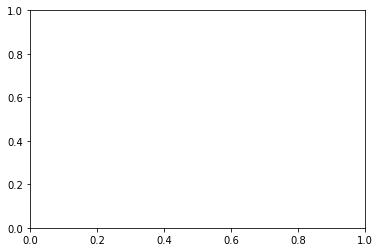

In [ ]:
from matplotlib import pyplot as plt

epochs = []
for x in range(20):
  epochs.append(x+1)

losses = []
for epoch in loss_list:
  losses.append(epoch.item())

plt.plot(epochs, losses)
plt.ylabel('loss')
plt.xlabel('epoch')


In [ ]:
sum(preds) / len(preds)

0.6853776158685325

In [ ]:

z_customer = model('customer', batch=dataset.node_index_dict['customer']).detach().detach()
z_product = model('product', batch=dataset.node_index_dict['product']).detach().detach()
examples = dataset.edge_index_dict["customer", "purchases", "product"].T
labels = dataset.edge_label_dict["customer", "purchases", "product"]

#examples = testdataset.edge_index_dict["customer", "purchases_test", "product"].T
#labels = testdataset.edge_label_dict["customer", "purchases_test", "product"]
examples_test = dataset.edge_index_dict["customer", "purchases", "product"].T
labels_test = dataset.edge_label_dict["customer", "purchases", "product"]



emb_128 = np.concatenate((z_customer.cpu().numpy(), z_product.cpu().numpy()), axis=0)

np_labels = labels.cpu().numpy()
np_labels_test = labels_test.cpu().numpy()

print(len(np_labels_test))
# train embeddings
edge_embeddings = link_examples_to_features(examples, emb_128, operator_l2)
np_edge_embeddings = np.array(edge_embeddings)
positive_embeddings = []
negative_embeddings = []
for i in range(len(np_edge_embeddings)):
  if np_labels[i] == 0:
    negative_embeddings.append(np_edge_embeddings[i])
  else:
    positive_embeddings.append(np_edge_embeddings[i])

# test embeddings
edge_embeddings_test = link_examples_to_features(examples_test, emb_128, operator_l2)
np_edge_embeddings_test = np.array(edge_embeddings_test)
positive_embeddings_test = []
negative_embeddings_test = []

for i in range(len(np_edge_embeddings_test)):
  if np_labels_test[i] == 0:
    negative_embeddings_test.append(np_edge_embeddings_test[i])
  else:
    positive_embeddings_test.append(np_edge_embeddings_test[i])



50276


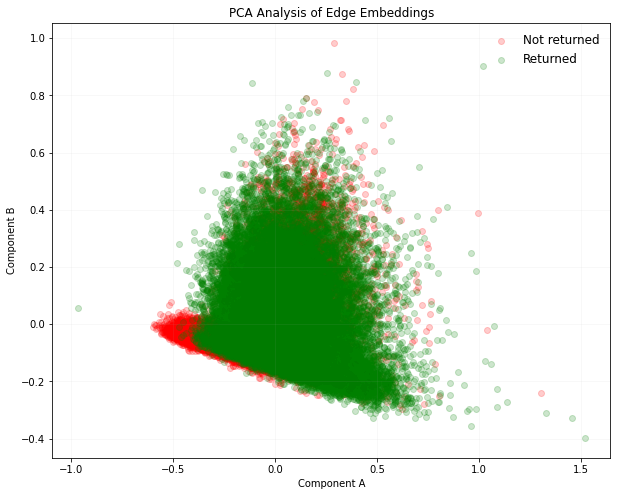

In [ ]:
# fit and transform using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
emb2d = pca.fit_transform(edge_embeddings_test)

cdict = {0: "red", 1: "green"}
labeldict = {0: "Not returned", 1: "Returned"}

fig = plt.figure(figsize=(10,8))
ax = fig.gca()
for i in range(0,2):
    ix = np.where(np_labels_test == i)
    ax.scatter(emb2d[ix,0],emb2d[ix,1], marker="o", alpha=0.2, color=cdict[i], label=labeldict[i])
ax.set_title("PCA Analysis of Edge Embeddings")
ax.legend(fontsize=12, frameon=False)
ax.set_xlabel("Component A")
ax.set_ylabel("Component B")
ax.grid(True, alpha=0.1)
plt.show()